<a href="https://colab.research.google.com/github/wilpat/Supermarket-EDA/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import io

In [0]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [0]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [0]:
import warnings
def ignore_warns(*args, **kwargs):
  pass
warnings.warn = ignore_warns #Ignore warnings from sklearn and seaborn

In [0]:
# Uncomment and run this the first time you start your colab
# from google.colab import files
# uploaded = files.upload()

In [0]:
df = pd.read_csv('train.csv')
# Dataset is now stored in a Pandas Dataframe

In [8]:
import os
#print(os.listdir('.'))
!ls

sample_data  train.csv


In [9]:
df.head().transpose()


,0,1,2,3,4
Product_Identifier,DRA12,DRA12,DRA12,DRA12,DRA12
Supermarket_Identifier,CHUKWUDI010,CHUKWUDI013,CHUKWUDI017,CHUKWUDI018,CHUKWUDI035
Product_Supermarket_Identifier,DRA12_CHUKWUDI010,DRA12_CHUKWUDI013,DRA12_CHUKWUDI017,DRA12_CHUKWUDI018,DRA12_CHUKWUDI035
Product_Weight,11.6,11.6,11.6,11.6,11.6
Product_Fat_Content,Low Fat,Low Fat,Low Fat,Low Fat,Ultra Low fat
Product_Shelf_Visibility,0.068535,0.0409118,0.0411775,0.0411127,0
Product_Type,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks
Product_Price,357.54,355.79,350.79,355.04,354.79
Supermarket_Opening_Year,2005,1994,2014,2016,2011
Supermarket _Size,NaN,High,NaN,Medium,Small


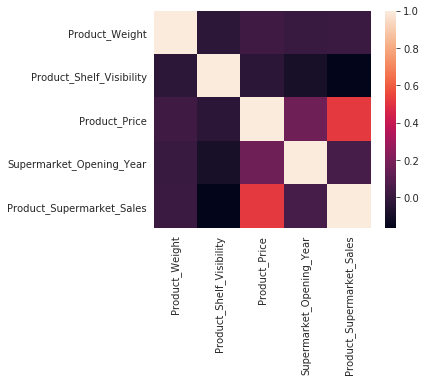

In [10]:
#Product_supermarket_sales is our dependent variable so I's use a Heatmap to find some correlation
corrmat = df.corr()
f, ax = plt.subplots(figsize = (5,4))
sns.heatmap(corrmat, square = True)

In [0]:
#Using seaborn on categorical data only since it only works with numeric and non-empty data
#Getting the cols that have missing data
missing = (df.isnull().sum() / len(df)) * 100 # Find the % in which missing values of the cols bearing them contributes to the total dataset

In [12]:
missing

Product_Identifier                 0.000000
Supermarket_Identifier             0.000000
Product_Supermarket_Identifier     0.000000
Product_Weight                    16.072144
Product_Fat_Content                0.000000
Product_Shelf_Visibility           0.000000
Product_Type                       0.000000
Product_Price                      0.000000
Supermarket_Opening_Year           0.000000
Supermarket _Size                 29.058116
Supermarket_Location_Type          0.000000
Supermarket_Type                   0.000000
Product_Supermarket_Sales          0.000000
dtype: float64

In [13]:
#Retain only colums with missing data
missing = missing.drop(missing[missing==0].index).sort_values(ascending=False)
result = pd.DataFrame({'Missing %' : missing})
result

,Missing %
Supermarket _Size,29.058116
Product_Weight,16.072144


<Figure size 432x288 with 0 Axes>

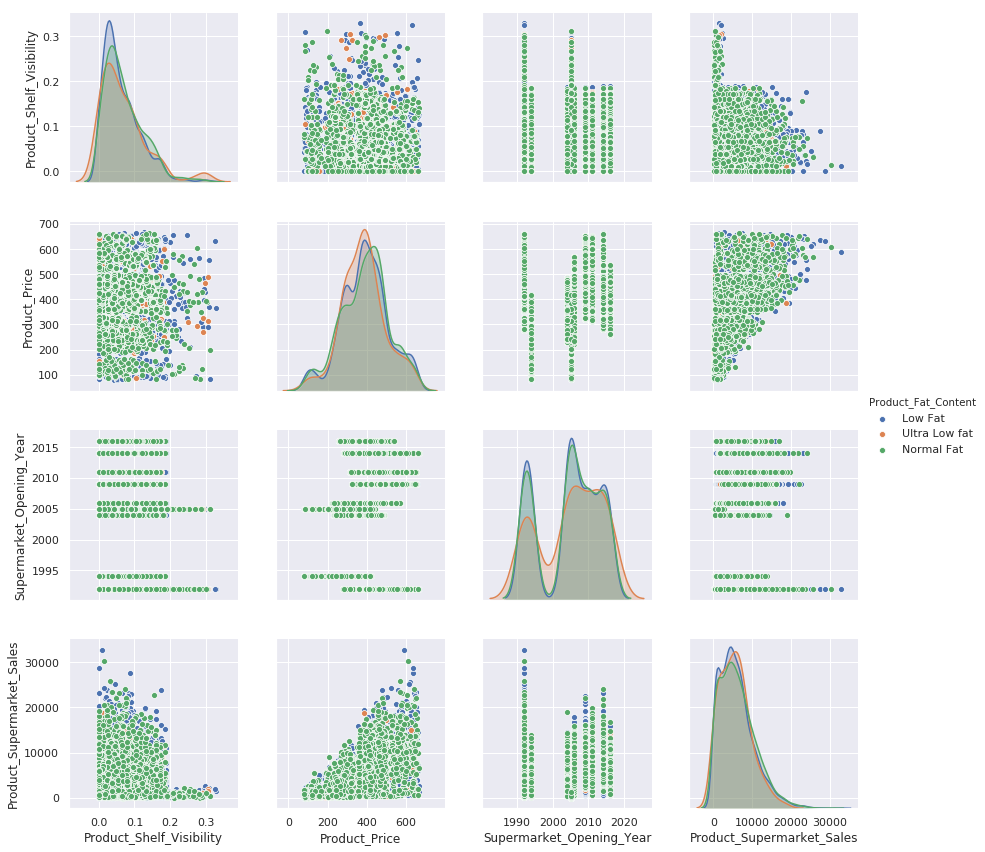

<Figure size 432x288 with 0 Axes>

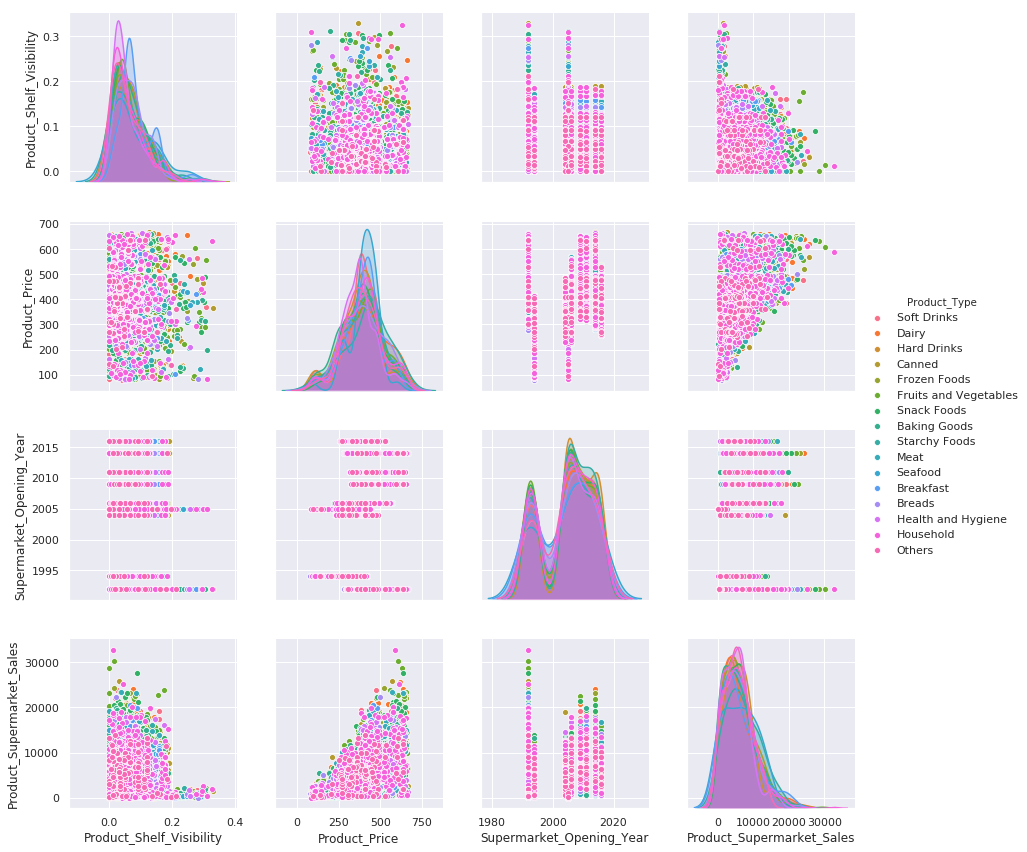

<Figure size 432x288 with 0 Axes>

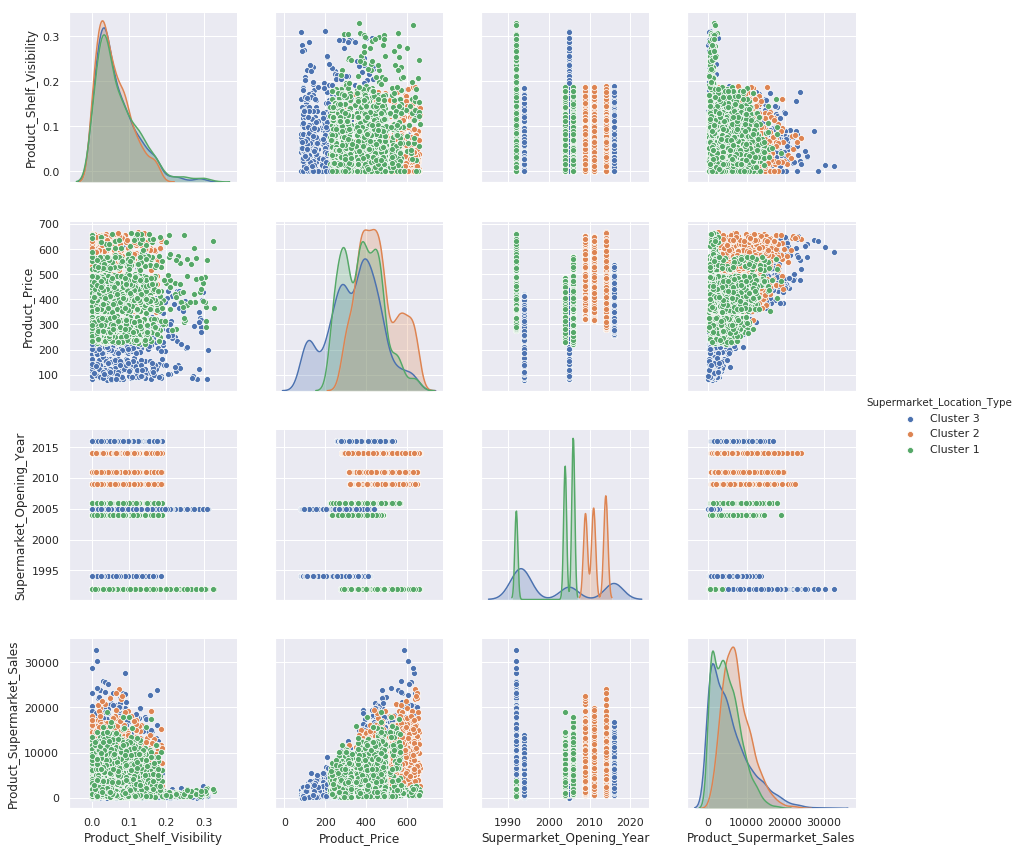

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 432x288 with 0 Axes>

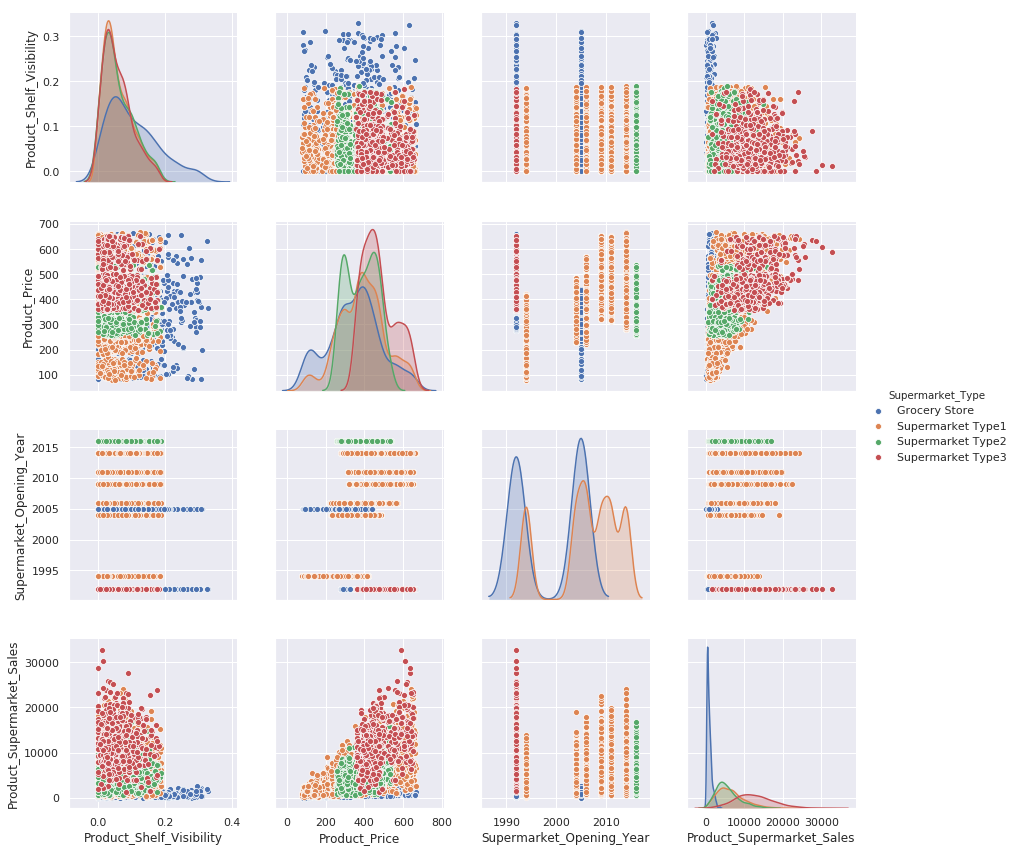

In [14]:
cat_col = ['Product_Fat_Content', 'Product_Type', 'Supermarket_Location_Type', 'Supermarket_Type']
for col in cat_col:
  sns.set()
  cols = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier', 'Product_Fat_Content', 'Product_Shelf_Visibility',
          'Product_Type', 'Product_Price', 'Supermarket_Opening_Year', 'Supermarket_Location_Type', 'Supermarket_Type', 'Product_Supermarket_Sales']
  plt.figure()
  sns.pairplot(df[cols], size = 3.0, hue = col)
  plt.show()

In [15]:
# Feature Engineering
df['Product_Fat_Content'].unique()

array(['Low Fat', 'Ultra Low fat', 'Normal Fat'], dtype=object)

In [0]:
fat_content_dict = {'Low Fat': 0, 'Ultra Low fat': 0, 'Normal Fat': 1}
df['is_normal_fat'] = df['Product_Fat_Content'].map(fat_content_dict)

In [21]:
df['is_normal_fat'].unique()

array([0, 1])

In [23]:
df['is_normal_fat'].value_counts()

0    3217
1    1773
Name: is_normal_fat, dtype: int64

In [24]:
# Create a feature for grouping when the store was opened
def group_open_year(year):
  if year < 1996:
    return 0
  else:
    return 1
df['opened_in_2000s'] = df['Supermarket_Opening_Year'].apply(group_open_year)
df.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,is_normal_fat,opened_in_2000s
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08,0,1
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,0,0
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,0,1
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,0,1
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,0,1


In [0]:
#Create column to represent grouping of products into two categories 
# 1 for Household, health hygiene, others,
# 2 For the others

#This is cos we noticed from the EDA that the first category here displayed a different price trend from the rest categories

#Get all the categories
prod_type_cat = list(df['Product_Type'].unique())

In [0]:
# Remove the ones meant for category 1
prod_type_cat.remove('Health and Hygiene')
prod_type_cat.remove('Household')
prod_type_cat.remove('Others')

def group_product_type(product):
  if product in prod_type_cat:
    return 0
  else:
    return 1

df['Product_type_group'] = df['Product_Type'].apply(group_product_type)

In [29]:
df.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,is_normal_fat,opened_in_2000s,Product_type_group
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08,0,1,0
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,0,0,0
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,0,1,0
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,0,1,0
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,0,1,0


Text(0.5, 1.0, 'Transformation of Product_Shelf_Visibility')

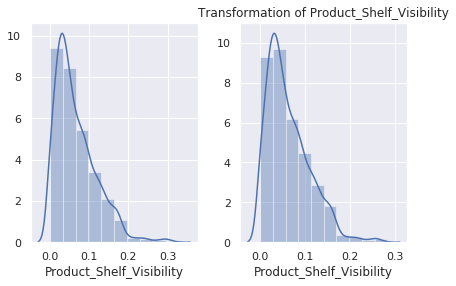

In [36]:
# Transform right skewed features
# During the EDA Product_Supermarket_Sales and Product_Shelf_Visibility where seen to be right skewed
# So we log transform them to have a normal distribution
fig, ax = plt.subplots(1,2)

# We'd do that of Product_Shelf_Visibility first then Product_Supermarket_Sales next

# Plot the normal Product_Shelf_Visibility on the first axis
sns.distplot(df['Product_Shelf_Visibility'], bins=10, ax=ax[0])

# Transform the Product_Shelf_Visibility column and plot on the secontd axis
df['Product_Shelf_Visibility'] = np.log1p(df['Product_Shelf_Visibility'])
sns.distplot(df['Product_Shelf_Visibility'], bins=10, ax=ax[1])

plt.tight_layout()
plt.title('Transformation of Product_Shelf_Visibility')

Text(0.5, 1.0, 'Transformation of Product_Supermarket_Sales')

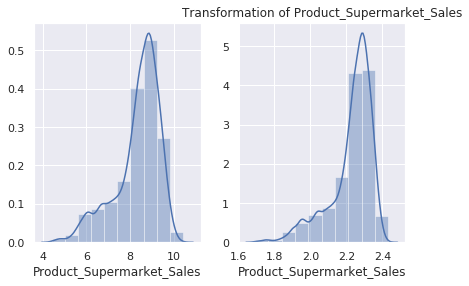

In [38]:
fig, ax = plt.subplots(1,2)
# Plot the normal Product_Supermarket_Sales on the first axis
sns.distplot(df['Product_Supermarket_Sales'], bins=10, ax=ax[0])

# Transform the Product_Supermarket_Sales column and plot on the secontd axis
df['Product_Supermarket_Sales'] = np.log1p(df['Product_Supermarket_Sales'])
sns.distplot(df['Product_Supermarket_Sales'], bins=10, ax=ax[1])

plt.tight_layout()
plt.title('Transformation of Product_Supermarket_Sales')

# Categorical Encoding

In [49]:
# How to check the feature and their unique classes
# I'd do just two here and the rest behind the scenes
df['Product_Fat_Content'].value_counts()

Low Fat          3039
Normal Fat       1773
Ultra Low fat     178
Name: Product_Fat_Content, dtype: int64

In [50]:
df['Product_Type'].value_counts()

Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Product_Type, dtype: int64

We can use one hot encoding here since the largest unique classes seen in the dataset is 15, belonging to Product_Type and this is less than 20 classes.

We're using one hot encoding since this is a non-ordinal categorical feauture. 

In [0]:
#Saving a copy of out df in case we need it
df1 = df.copy()

In [53]:
#Save the target value to a variable
y = df1['Product_Supermarket_Sales']
df1.drop(['Product_Supermarket_Sales'], axis = 1, inplace = True)

#One hot encoding the data using pandas dummy function
dummified_data = pd.get_dummies(df1)
dummified_data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,is_normal_fat,opened_in_2000s,Product_type_group,Product_Identifier_DRA12,Product_Identifier_DRA24,Product_Identifier_DRA59,...,Supermarket _Size_High,Supermarket _Size_Medium,Supermarket _Size_Small,Supermarket_Location_Type_Cluster 1,Supermarket_Location_Type_Cluster 2,Supermarket_Location_Type_Cluster 3,Supermarket_Type_Grocery Store,Supermarket_Type_Supermarket Type1,Supermarket_Type_Supermarket Type2,Supermarket_Type_Supermarket Type3
0,11.6,0.066289,357.54,2005,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,11.6,0.040097,355.79,1994,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2,11.6,0.040352,350.79,2014,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,11.6,0.040290,355.04,2016,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,11.6,0.000000,354.79,2011,0,1,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


# Taking care of missing values

In [56]:
# Print null columns
dummified_data.isnull().sum()

Product_Weight                                      802
Product_Shelf_Visibility                              0
Product_Price                                         0
Supermarket_Opening_Year                              0
is_normal_fat                                         0
opened_in_2000s                                       0
Product_type_group                                    0
Product_Identifier_DRA12                              0
Product_Identifier_DRA24                              0
Product_Identifier_DRA59                              0
Product_Identifier_DRB01                              0
Product_Identifier_DRB13                              0
Product_Identifier_DRB24                              0
Product_Identifier_DRB25                              0
Product_Identifier_DRB48                              0
Product_Identifier_DRC01                              0
Product_Identifier_DRC12                              0
Product_Identifier_DRC13                        

The data increase is as a result of the one-hot-encoding we did just now

In [59]:
# There is just have one feature with missing values, so we'd handle the 
# Filling of it'd content manually
# I'd do this by filling the missing values with the mean of the column

pw_mean = dummified_data['Product_Weight'].mean()
dummified_data['Product_Weight'].fillna(pw_mean, inplace =True)

#Check to see if it worked
dummified_data.isnull().sum()

Product_Weight                                      0
Product_Shelf_Visibility                            0
Product_Price                                       0
Supermarket_Opening_Year                            0
is_normal_fat                                       0
opened_in_2000s                                     0
Product_type_group                                  0
Product_Identifier_DRA12                            0
Product_Identifier_DRA24                            0
Product_Identifier_DRA59                            0
Product_Identifier_DRB01                            0
Product_Identifier_DRB13                            0
Product_Identifier_DRB24                            0
Product_Identifier_DRB25                            0
Product_Identifier_DRB48                            0
Product_Identifier_DRC01                            0
Product_Identifier_DRC12                            0
Product_Identifier_DRC13                            0
Product_Identifier_DRC24    

# Train - test split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dummified_data, y, test_size = 0.3)

In [63]:

print("Training dependent variable: ", X_train.shape)
print("Training independent variable: ", y_train.shape)
print("Testing dependent variable: ", X_test.shape)
print("Testing independent variable: ", y_test.shape)

Training dependent variable:  (3493, 6487)
Training independent variable:  (3493,)
Testing dependent variable:  (1497, 6487)
Testing independent variable:  (1497,)


# Feature Scaling

This is to ensure a similar range of values among every feature as it helps our models do better

In [65]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train) #Fit the scaler to the training data

# Perform the transformation on train and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5, :5]



array([[-0.87206088,  0.70521749,  0.14664198, -0.70588235,  1.        ],
       [ 1.08905023, -0.47948252, -0.07437436,  0.47058824,  0.        ],
       [ 0.89460579,  0.12184887,  0.10942288, -0.70588235,  1.        ],
       [-0.03594977,  0.31742139,  0.53817671,  0.17647059,  1.        ],
       [-0.37692199,  0.76129462, -0.14293922,  0.47058824,  0.        ]])